In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [13]:
df=pd.read_csv("Advertising.csv", index_col=0)

In [14]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
#checking the duplicates
df.duplicated().any()

False

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


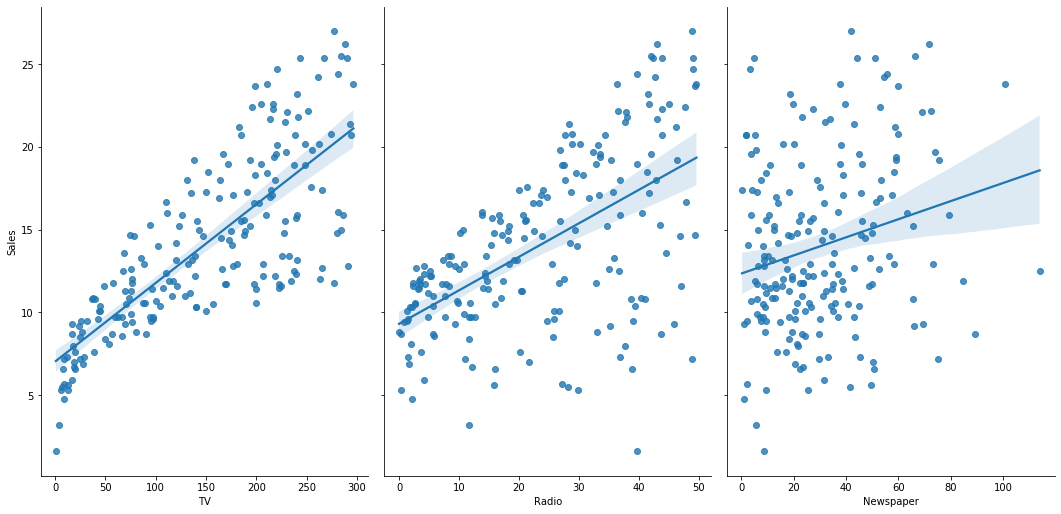

In [37]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [39]:
X=df[['TV','Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [40]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [73]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [74]:

# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# Splitting X and y into training and testing sets

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Linear regression in scikit-learn

In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [78]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Interpreting model coefficients

In [81]:
print("Intercept", reg.intercept_)
print("Coefficient", reg.coef_)

Intercept 2.8769666223179318
Coefficient [0.04656457 0.17915812 0.00345046]


In [83]:
# pair the feature names with the coefficients
list(zip(X, reg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

# Making predictions

In [84]:
y_pred = reg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values!

Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [85]:

# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [86]:

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [87]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [88]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


# Computing the RMSE for our Sales predictions

In [89]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


Feature selection
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [92]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
reg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = reg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886



The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.